In [2]:
#Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [3]:
#read the data set
df=pd.read_csv("/content/Social_Network_Ads.csv")
df


,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


Data cleaning

In [ ]:
df.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [ ]:
df.dtypes

User ID             int64
Gender             object
Age                 int64
EstimatedSalary     int64
Purchased           int64
dtype: object

In [ ]:
df.drop(columns=['User ID'])

,Gender,Age,EstimatedSalary,Purchased
0,Male,19,19000,0
1,Male,35,20000,0
2,Female,26,43000,0
3,Female,27,57000,0
4,Male,19,76000,0
...,...,...,...,...
395,Female,46,41000,1
396,Male,51,23000,1
397,Female,50,20000,1
398,Male,36,33000,0


In [ ]:
df['Gender']=df['Gender'].map({'Male':0,'Female':1})  #LABEL ENCODING

In [ ]:
df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,0,19,19000,0
1,15810944,0,35,20000,0
2,15668575,1,26,43000,0
3,15603246,1,27,57000,0
4,15804002,0,19,76000,0
...,...,...,...,...,...
395,15691863,1,46,41000,1
396,15706071,0,51,23000,1
397,15654296,1,50,20000,1
398,15755018,0,36,33000,0


In [ ]:
df.describe()

,User ID,Gender,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000,400.000000
mean,1.569154e+07,0.510000,37.655000,69742.500000,0.357500
std,7.165832e+04,0.500526,10.482877,34096.960282,0.479864
min,1.556669e+07,0.000000,18.000000,15000.000000,0.000000
25%,1.562676e+07,0.000000,29.750000,43000.000000,0.000000
50%,1.569434e+07,1.000000,37.000000,70000.000000,0.000000
75%,1.575036e+07,1.000000,46.000000,88000.000000,1.000000
max,1.581524e+07,1.000000,60.000000,150000.000000,1.000000


In [ ]:
df.isna().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

**EDA**

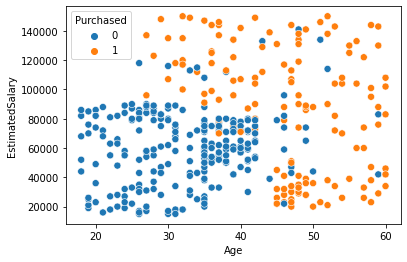

In [ ]:
import seaborn as sns
plt.figure()
sns.scatterplot(x="Age",y='EstimatedSalary',hue="Purchased",data=df,s=50)

In [ ]:
#splitting the data
from sklearn.model_selection import train_test_split 
x=df[['Age','EstimatedSalary']].values
y=df['Purchased'].values
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [ ]:
#scaling
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(x_train)
x_train1=scaler.transform(x_train)
x_test1=scaler.transform(x_test)

In [ ]:
#fitting logisitic regression into training set
from sklearn.linear_model import LogisticRegression
loreg=LogisticRegression()
loreg.fit(x_train1,y_train)

LogisticRegression()

In [ ]:
y_pred=loreg.predict(x_test1)
y_pred

array([0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0])

In [ ]:
loreg.intercept_

array([-1.04635249])

In [ ]:
loreg.coef_

array([[2.00349924, 1.05545896]])

In [ ]:
loreg.predict_proba(x_test1)

array([[0.75667798, 0.24332202],
       [0.64874279, 0.35125721],
       [0.29449479, 0.70550521],
       [0.99628543, 0.00371457],
       [0.68011051, 0.31988949],
       [0.93863492, 0.06136508],
       [0.97614819, 0.02385181],
       [0.08565046, 0.91434954],
       [0.51385592, 0.48614408],
       [0.14669899, 0.85330101],
       [0.98617953, 0.01382047],
       [0.61254801, 0.38745199],
       [0.94835628, 0.05164372],
       [0.32779595, 0.67220405],
       [0.27910417, 0.72089583],
       [0.96789925, 0.03210075],
       [0.98246785, 0.01753215],
       [0.82699003, 0.17300997],
       [0.71629117, 0.28370883],
       [0.94872749, 0.05127251],
       [0.71329028, 0.28670972],
       [0.5834524 , 0.4165476 ],
       [0.83495746, 0.16504254],
       [0.98506674, 0.01493326],
       [0.02734653, 0.97265347],
       [0.56102649, 0.43897351],
       [0.09946396, 0.90053604],
       [0.45911811, 0.54088189],
       [0.94359144, 0.05640856],
       [0.7046217 , 0.2953783 ],
       [0.

In [ ]:
#evaluating the pred
from sklearn.metrics import plot_roc_curve,roc_curve,roc_auc_score,confusion_matrix,f1_score
loreg.score(x_test1,y_test)


0.8875

In [ ]:
confusion_matrix(y_test,y_pred)

array([[48,  2],
       [ 7, 23]])

In [ ]:
f1_score(y_test,y_pred)

0.8363636363636363

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


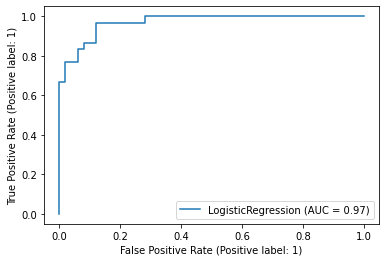

In [ ]:
plot_roc_curve(loreg,x_test1,y_test)

0.97 indicates that the model is excellent  model.